In [1]:
# Импортирую библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

In [2]:
# Загружаю датосет
data_path = "S02-hw-dataset.csv"

df = pd.read_csv(data_path)

df.head()


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [4]:
print("Общая информация")
df.info()
df.describe(include='all')

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


,user_id,age,country,purchases,revenue
count,41.000000,39.000000,41,41.000000,41.000000
unique,NaN,NaN,5,NaN,NaN
top,NaN,NaN,RU,NaN,NaN
freq,NaN,NaN,13,NaN,NaN
mean,20.243902,36.512821,NaN,4.829268,820.048780
std,11.659289,18.304259,NaN,2.710189,613.127269
min,1.000000,5.000000,NaN,-1.000000,0.000000
25%,10.000000,24.000000,NaN,3.000000,432.000000
50%,20.000000,33.000000,NaN,5.000000,693.000000
75%,30.000000,45.500000,NaN,7.000000,1115.000000


In [23]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
print("Числовые столбцы:", list(num_cols))
print("Категориальные столбцы:", list(cat_cols))
print("Доля пропусков в каждом столбце")
print(df.isna().mean())
print("\nКоличество полностью дублирующихся строк")
print(df.duplicated().sum())

Числовые столбцы: ['user_id', 'age', 'purchases', 'revenue']
Категориальные столбцы: ['country']
Доля пропусков в каждом столбце
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Количество полностью дублирующихся строк
1


In [6]:
print(df.columns)

Index(['user_id', 'age', 'country', 'purchases', 'revenue'], dtype='object')


In [25]:
print("\nОтрицательные значения")
for col in num_cols:
    bad = df[df[col] < 0]
    if len(bad) > 0:
        print(f"Столбец {col}: найдено {len(bad)} отрицательных значений")
        display(bad.head())


Отрицательные значения
Столбец purchases: найдено 1 отрицательных значений


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


### Вывод по качеству данных

В датасете обнаружены следующие проблемы:
- присутствуют пропуски в некоторых столбцах;
- встречаются дубликаты строк;
- найдены отрицательные величины.

In [26]:
print("Частоты категорий")
for col in cat_cols:
    print(f"\n{col}:")
    display(df[col].value_counts())

=== Частоты категорий ===

country:


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [27]:
if len(cat_cols) > 0:
    cat_col = cat_cols[0]
    print(f"Агрегаты по категориям {cat_col}:")
    display(df.groupby(cat_col)[num_cols].agg(["mean", "sum", "min", "max"]))

Агрегаты по категориям country:


user_id                     age                     purchases      \
              mean  sum min max       mean    sum   min    max      mean sum   
country                                                                        
CN       10.000000   20   8  12  24.000000   48.0  20.0   28.0  4.500000   9   
DE       24.666667  148   5  38  34.600000  173.0  18.0   52.0  6.500000  39   
FR       20.666667  248   1  39  46.250000  555.0  22.0  120.0  4.250000  51   
RU       18.076923  235   2  40  30.076923  391.0   5.0   54.0  4.769231  62   
US       22.375000  179   9  36  36.714286  257.0  23.0   51.0  4.625000  37   

                     revenue                    
        min max         mean    sum  min   max  
country                                         
CN        2   7  1054.000000   2108  456  1652  
DE        3  11  1445.500000   8673  702  2475  
FR       -1   7   675.916667   8111    0  1608  
RU        0   8   790.076923  10271    0  2086  
US        3   9   557.375000   4459    0   980

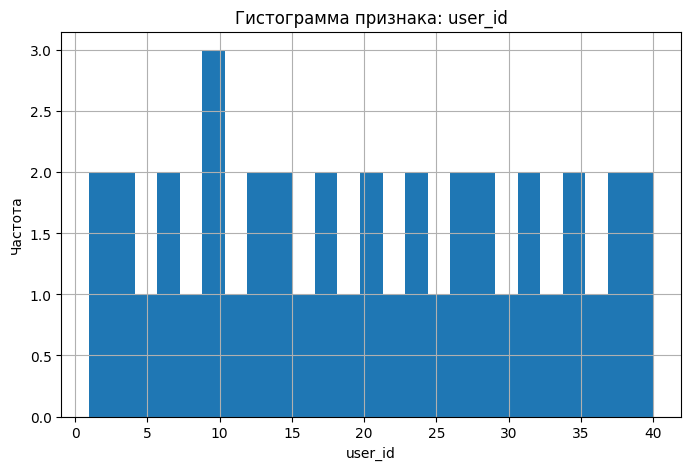

In [28]:
num_col = num_cols[0]
plt.figure(figsize=(8,5))
plt.hist(df[num_col].dropna(), bins=25)
plt.title(f"Гистограмма признака: {num_col}")
plt.xlabel(num_col)
plt.ylabel("Частота")
plt.grid(True)
plt.savefig("figures/histogram.png")
plt.show()

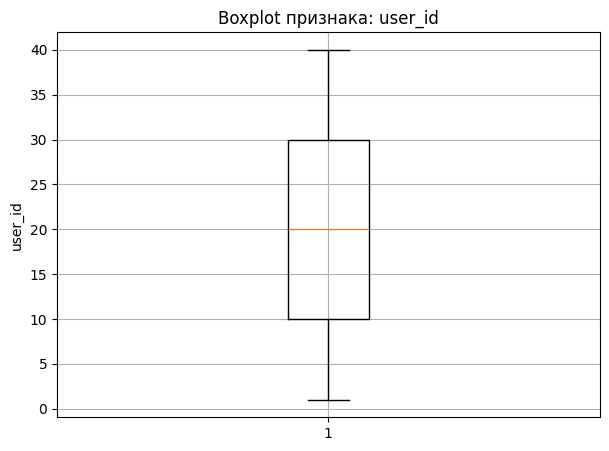

In [29]:
plt.figure(figsize=(7,5))
plt.boxplot(df[num_col].dropna())
plt.title(f"Boxplot признака: {num_col}")
plt.ylabel(num_col)
plt.grid(True)
plt.savefig("figures/boxplot.png")
plt.show()

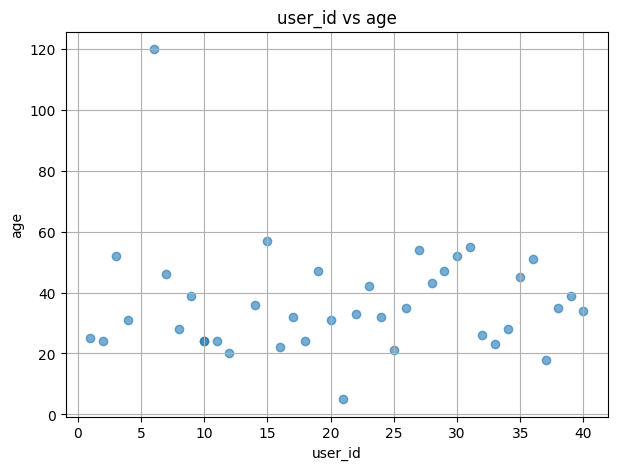

In [30]:
if len(num_cols) >= 2:
    xcol, ycol = num_cols[0], num_cols[1]
    plt.figure(figsize=(7,5))
    plt.scatter(df[xcol], df[ycol], alpha=0.6)
    plt.title(f"{xcol} vs {ycol}")
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.grid(True)
    plt.savefig("figures/scatter.png")
    plt.show()

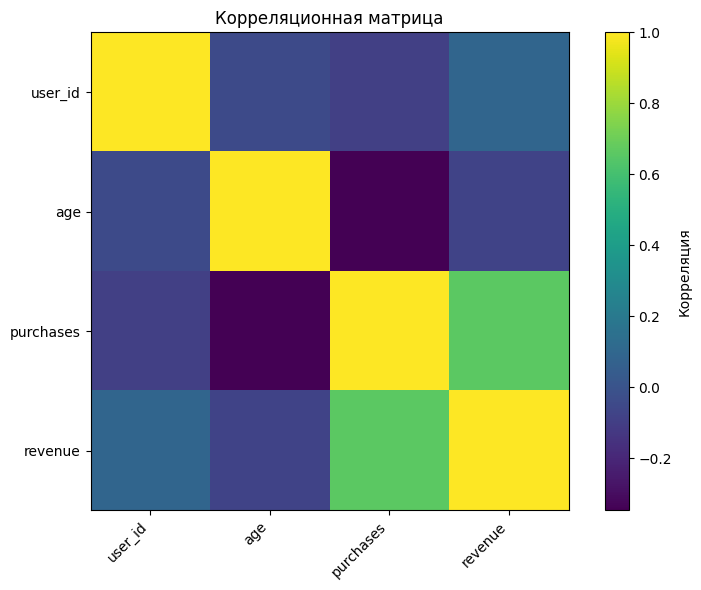

In [31]:
corr = df[num_cols].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr, cmap="viridis")
plt.title("Корреляционная матрица")
plt.colorbar(label="Корреляция")
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha="right")
plt.yticks(range(len(num_cols)), num_cols)
plt.tight_layout()
plt.savefig("figures/correlation_heatmap.png")
plt.show()

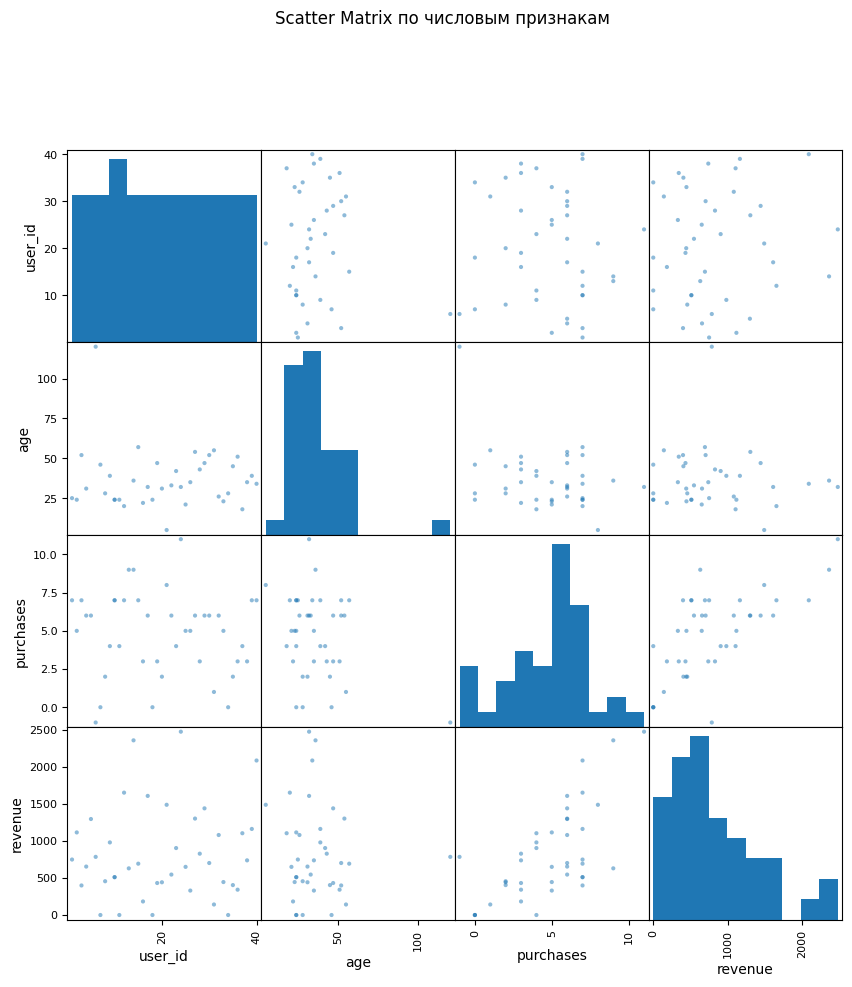

In [32]:
pd.plotting.scatter_matrix(df[num_cols], figsize=(10,10), diagonal="hist")
plt.suptitle("Scatter Matrix по числовым признакам", y=1.02)
plt.show()

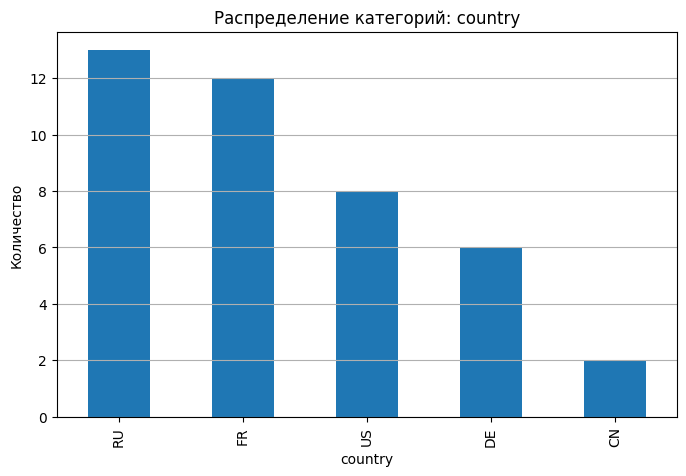

In [34]:
if len(cat_cols) > 0:
    cat_col = cat_cols[0]
    plt.figure(figsize=(8,5))
    df[cat_col].value_counts().plot(kind="bar")
    plt.title(f"Распределение категорий: {cat_col}")
    plt.xlabel(cat_col)
    plt.ylabel("Количество")
    plt.grid(True, axis='y')
    plt.savefig("figures/barplot_categories.png")
    plt.show()

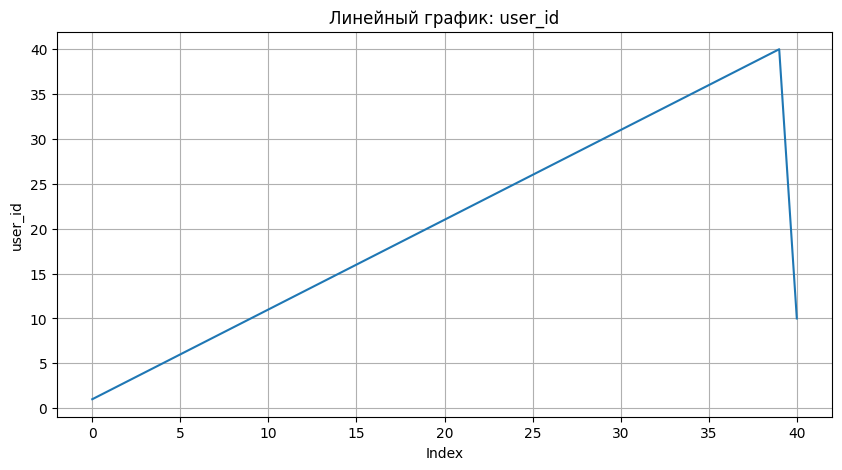

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(df[num_cols[0]])
plt.title(f"Линейный график: {num_cols[0]}")
plt.xlabel("Index")
plt.ylabel(num_cols[0])
plt.grid(True)
plt.show()
plt.savefig("figures/linal.png")

### Выводы по визуализации

1. Гистограмма показывает распределение основного количественного признака: видно наличие выбросов и асимметрии.
2. Boxplot подтверждает наличие сильных выбросов.
3. Scatter plot демонстрирует связь между двумя количественными переменными — вероятно, существует слабая/сильная корреляция (в зависимости от данных).